# モデル化

シミュレーションを行う際に一番最初に行うのは **モデル化** である．シミュレーションの結果は，どのようにモデル化を行ったかによって大きく影響される．当然ではあるが．

例えば，単振り子のシミュレーションにおいて，`0_quickstart`では **摩擦** による運動の減衰を考えなかったが，これを考えてモデル化を行ってみる．
振子と天井の結点の部分で粘性摩擦を仮定し，角速度に比例した力$-c\dot{\theta}$がはたらくものとする．すると，運動方程式は
\begin{align}
ml\ddot{\theta} = -mg\sin\theta - c\dot{\theta}
\end{align}
となる．

In [1]:
import numpy as np
from scipy.integrate import odeint
from math import sin

''' constants '''
m = 1 # mass of the pendulum [kg]
l = 1 # length of the pendulum [m]
g = 10 # Gravitational acceleration [m/s^2]
c = 0.3 # Damping constant [kg.m/(rad.s)]

''' time setting '''
t_end = 10 # simulation time [s]
t_fps = 50 # frame per second. This value means smoothness of produced graph and animation
t_step = 1/t_fps 
t = np.arange(0, t_end, t_step) 

''' initial value '''
theta_init = 0 # initial value of theta [rad]
dtheta_init = 1 # initial value of dot theta [rad/s]
s_init = np.array([theta_init, dtheta_init])

def odefunc(s, t):
    theta = s[0]
    dtheta = s[1]
    ddtheta = -g/l*sin(theta) - c*dtheta# <- Equation of motion
    return np.r_[dtheta, ddtheta]

s = odeint(odefunc, s_init, t)
print('ODE calculation finished.')

ODE calculation finished.


振り子の角度の時間変化をグラフにすると，このようになっている．

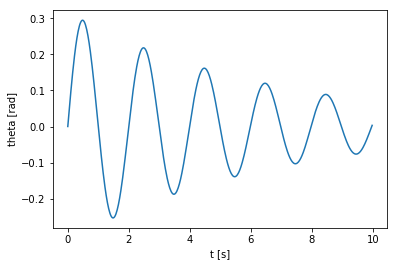

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.plot(t, s[:, 0])
plt.xlabel('t [s]')
plt.ylabel('theta [rad]')
plt.show()

**摩擦** という要素を考えることによって運動の様相が変化したことがわかる．

シミュレーションを行う上では，考えたい物理モデルをどのようにモデル化するかによって，得られる結果が大きく変わる．所望のシミュレーションを行うためには，十分な力学の知識が必要となる．

## Lagrange の運動方程式

`0_quickstart`では，単振り子の運動方程式をニュートンの運動方程式から求めたが，今度は **ラグランジュの運動方程式** から求める．

おもりの運動エネルギーは
\begin{align}
  T = \frac{1}{2}m(l\dot{\theta})^2
\end{align}
であり，ポテンシャルエネルギー（位置エネルギー）は
\begin{align}
  U = - m(-g)(l-l\cos\theta) = mgl(1 - \cos\theta)
\end{align}
である．したがって，系のラグランジアンは
\begin{align}
  L = T - U = \frac{1}{2}m(l\dot{\theta})^2 - mgl(1 - \cos\theta)
\end{align}
であり，ラグランジュの運動方程式は
\begin{align}
  \frac{d}{dt}\left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} = 0
\end{align}
である．項を一つ一つ丁寧に計算をすると，
\begin{align}
  \frac{\partial L}{\partial \dot{\theta}} = \frac{\partial }{\partial \dot{\theta}} \left( \frac{1}{2}m(l\dot{\theta})^2 - mgl(1 - \cos\theta) \right) = ml^2\dot{\theta}
\end{align}
\begin{align}
  \frac{d}{dt}\left( \frac{\partial L}{\partial \dot{\theta}} \right) = \frac{d}{dt} (ml^2\dot{\theta}) = ml^2\ddot{\theta}
\end{align}
\begin{align}
  \frac{\partial L}{\partial \theta} = \frac{\partial }{\partial \theta} \left( \frac{1}{2}m(l\dot{\theta})^2 - mgl(1 - \cos\theta) \right) = -mgl \sin\theta
\end{align}
より，
\begin{align}
  \frac{d}{dt}\left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} = ml^2\ddot{\theta} - (-mgl \sin\theta) = 0
\end{align}
よって，
\begin{align}
 ml^2\ddot{\theta} + mgl \sin\theta = 0
\end{align}
である．式を整理すると，
\begin{align}
\ddot{\theta} = -\frac{g}{l} \sin\theta 
\end{align}
となっており，ニュートンの運動方程式から導出したものと同じ結果が得られたことがわかる．



## Lagrange の運動方程式を SymPy で計算する

Lagrange の運動方程式は運動の自由度についてのミニマムな運動方程式を記述することができる．しかし，ラグランジアンとその偏微分の計算は複雑になりがちである．単振り子の例については，運動の自由度は1であり，かつ非常にシンプルな状況であるため手で計算してもよいのだが，これが他リンク系となったり，運動を2次元から3次元に拡張したりしたときには，もはや手計算で求める気力が起こらない．

そこで， Python を使って Lagrange の運動方程式を導く． [SymPy](http://www.sympy.org/en/index.html) の [LagrangesMethod クラス](http://docs.sympy.org/latest/modules/physics/mechanics/api/kane_lagrange.html?highlight=lagrangesmethod#sympy.physics.mechanics.lagrange.LagrangesMethod) を用いる．

In [3]:
import sympy as sym
import sympy.physics.mechanics as me

t = sym.symbols('t')

l, m, g = sym.symbols('l m g')
theta = me.dynamicsymbols('theta')
dtheta = me.dynamicsymbols('theta', 1)

''' Kinetic energy '''
T = m*(l*dtheta)**2/2
''' Potential energy '''
U = -m*(-g)*(l - l*sym.cos(theta))

''' Lagurangian '''
L = T - U

''' Calculating the eom '''
LM = me.LagrangesMethod(L, [theta])

print(LM.form_lagranges_equations())

Matrix([[g*l*m*sin(theta(t)) + l**2*m*Derivative(theta(t), t, t)]])


出力結果は `Matrix([[g*l*m*sin(theta(t)) + l**2*m*Derivative(theta(t), t, t)]])` となる． `Matrix([[ ... ]])` の中に記述されている部分に着目すると，手計算で求めた
\begin{align}
 ml^2\ddot{\theta} + mgl \sin\theta = 0
\end{align}
の左辺と一致していることがわかる．ただし， `Derivative(theta(t), t, t)` は $\theta$ の二階の微分 (derivative) である．

## 【参考】散逸項を含む形での Lagrange の運動方程式

先に記述した粘性摩擦のような外力については， **散逸関数** とその一般加速度微分項を考えることで運動方程式に加えることができる．

散逸関数は，
\begin{align}
D = \frac{1}{2}c\dot{\theta}^2
\end{align}
である．そして Lagrange の運動方程式は
\begin{align}
  \frac{d}{dt}\left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} + \frac{\partial D}{\partial \dot{\theta}} = 0
\end{align}
を計算することになる．

## 【参考】一般化座標への入力を含む形での Lagrange の運動方程式
一般化座標$\theta$について，この方向に加速度を加えるような入力が加えられるとする．つまり，振子の結点の部分にモータが取り付けられていて，このモータから直接トルクが加えられるような状況である．このとき，加えられるトルクを$\tau$とすると，
\begin{align}
  \frac{d}{dt}\left( \frac{\partial L}{\partial \dot{\theta}} \right) - \frac{\partial L}{\partial \theta} = \tau
\end{align}
となる．


###### todo

* sympy, コードの説明